<a href="https://colab.research.google.com/github/Subhadip72/Anomaly_detection/blob/main/cats_vs_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:05<00:00, 272MB/s]
100% 812M/812M [00:05<00:00, 151MB/s]


In [ ]:
import os
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile

In [ ]:
dataset = os.makedirs('/content/dataset')

local_zip = '/content/dogs-vs-cats.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [ ]:
local_zip = '/content/dataset/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

local_zip = '/content/dataset/test1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [ ]:
train_original_path = '/content/dataset/train'
source_dir = os.makedirs('/content/cats-vs-dogs')

In [ ]:
def create_train_val_dirs(source_path):

  path_train = os.path.join(source_path, 'training')
  os.makedirs(path_train)
  path_cats = os.path.join(path_train, 'cats')
  os.makedirs(path_cats)
  path_dogs = os.path.join(path_train, 'dogs')
  os.makedirs(path_dogs)

  path_val = os.path.join(source_path, 'validation')
  os.makedirs(path_val)
  path_cats = os.path.join(path_val, 'cats')
  os.makedirs(path_cats)
  path_dogs = os.path.join(path_val, 'dogs')
  os.makedirs(path_dogs)

In [ ]:
source_path = '/content/cats-vs-dogs'

create_train_val_dirs(source_path)

for rootdir, dirs, files in os.walk(source_path):
  for subdir in dirs:
    print(os.path.join(rootdir, subdir))

/content/cats-vs-dogs/validation
/content/cats-vs-dogs/training
/content/cats-vs-dogs/validation/cats
/content/cats-vs-dogs/validation/dogs
/content/cats-vs-dogs/training/cats
/content/cats-vs-dogs/training/dogs


In [ ]:
separated_data = os.makedirs('/content/separated-images')

cats_dir = os.makedirs('/content/separated-images/cats')
dogs_dir = os.makedirs('/content/separated-images/dogs')

In [ ]:
dogs_path = '/content/separated-images/dogs'
cats_path = '/content/separated-images/cats'

def copy_images_train(original_path, dogs_path, cats_path):
  for filename in os.listdir(original_path):
    if filename is not None:
      if 'dog' in filename:
        copyfile(os.path.join(original_path, filename), os.path.join(dogs_path, filename))
      elif 'cat' in filename:
        copyfile(os.path.join(original_path, filename), os.path.join(cats_path, filename))


copy_images_train(train_original_path, dogs_path, cats_path)

In [ ]:
print("The number of images of dogs : ", len(os.listdir(dogs_path)))
print("The number of images of cats : ", len(os.listdir(cats_path)))

The number of images of dogs :  12500
The number of images of cats :  12500


In [ ]:
import random

def split_data(ORIGINAL_DIR, TRAINING_DIR, VALIDATION_DIR, split_size):

  files = []

  for file in os.listdir(ORIGINAL_DIR):
    file_path = ORIGINAL_DIR + file
    if os.path.getsize(file_path) > 0:
      files.append(file)
    else:
      print(file + " is of zero length, so ignoring!")

  training_length = int(len(files) * split_size)
  validation_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0 : training_length]
  validation_set = shuffled_set[-validation_length : ]

  for filename in training_set:
    src_file = ORIGINAL_DIR + filename
    dest_file = TRAINING_DIR + filename
    copyfile(src_file, dest_file)

  for filename in validation_set:
    src_file = ORIGINAL_DIR + filename
    dest_file = VALIDATION_DIR + filename
    copyfile(src_file, dest_file)

In [ ]:
CAT_SOURCE_DIR = '/content/separated-images/cats/'
DOG_SOURCE_DIR = '/content/separated-images/dogs/'

TRAINING_CATS_DIR = '/content/cats-vs-dogs/training/cats/'
TRAINING_DOGS_DIR = '/content/cats-vs-dogs/training/dogs/'

VALIDATION_CATS_DIR = '/content/cats-vs-dogs/validation/cats/'
VALIDATION_DOGS_DIR = '/content/cats-vs-dogs/validation/dogs/'

SPLIT_SIZE = 0.9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, SPLIT_SIZE)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, SPLIT_SIZE)

In [ ]:
print("There are ", len(os.listdir('/content/cats-vs-dogs/training/cats')), " cats images for training")
print("There are ", len(os.listdir('/content/cats-vs-dogs/training/dogs')), " dogs images for training")
print("There are ", len(os.listdir('/content/cats-vs-dogs/validation/cats')), " cats images for validation")
print("There are ", len(os.listdir('/content/cats-vs-dogs/validation/dogs')), " dogs images for validation")

There are  11250  cats images for training
There are  11250  dogs images for training
There are  1250  cats images for validation
There are  1250  dogs images for validation


Sample training cat images


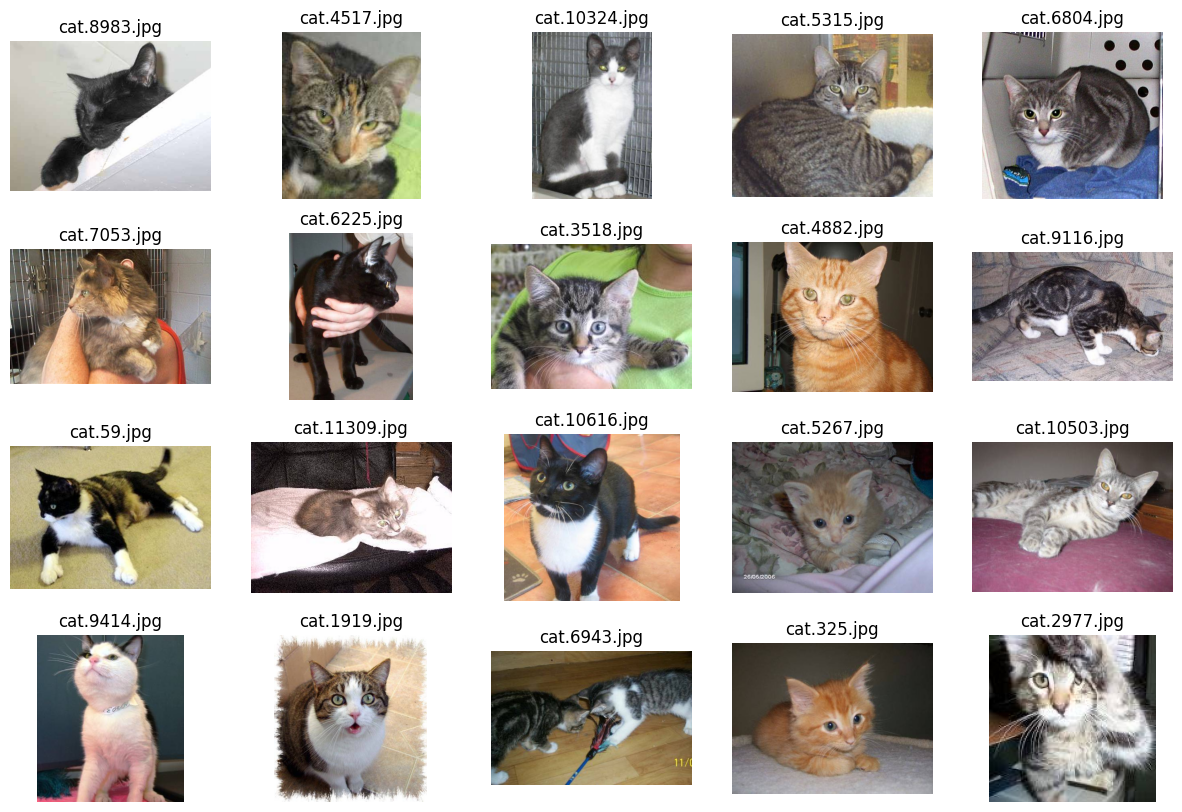

Sample training dog images


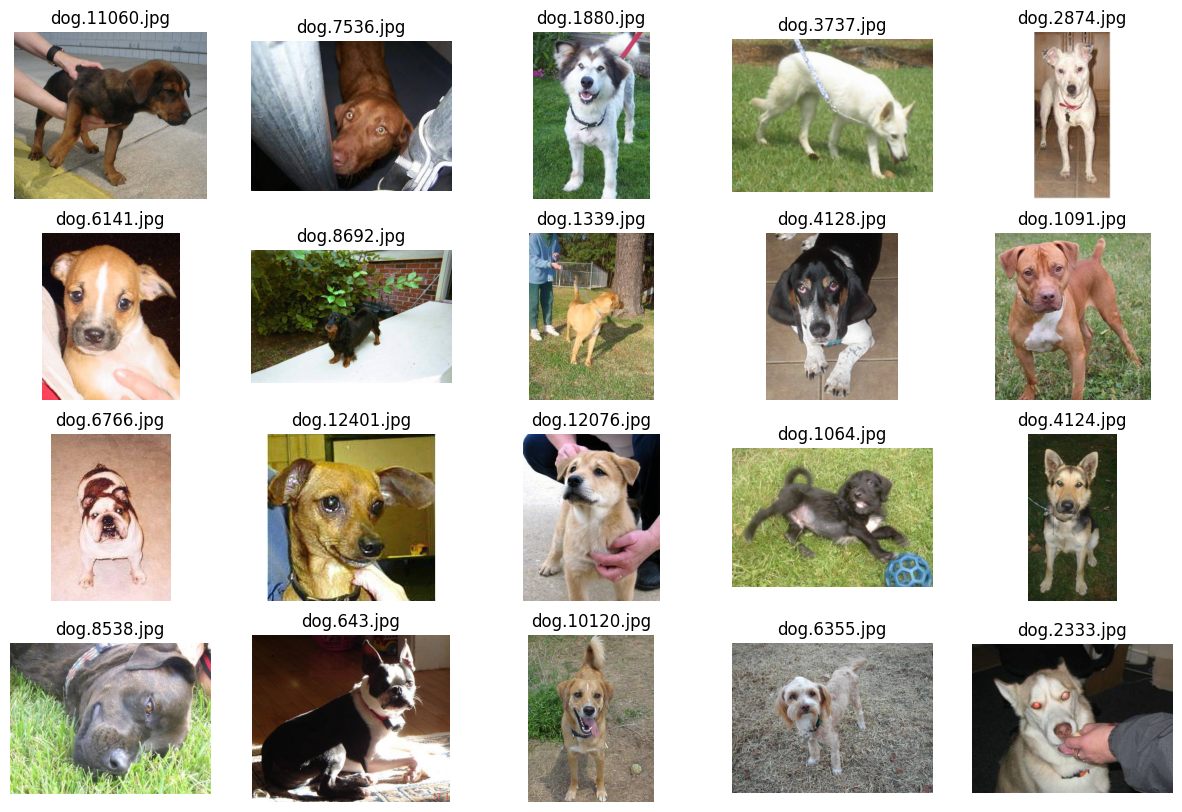

In [ ]:
import matplotlib.image as mpimg

train_path_cats = '/content/cats-vs-dogs/training/cats'
train_path_dogs = '/content/cats-vs-dogs/training/dogs'

def display_images(dir, num_images=20):
  img_files = [file for file in os.listdir(dir) if file.lower().endswith('.jpg')]
  selected_files = random.sample(img_files, min(num_images, len(img_files)))

  plt.figure(figsize=(15, 10))
  for i, filename in enumerate(selected_files, 1):
    img_path = os.path.join(dir, filename)
    img = mpimg.imread(img_path)

    plt.subplot(4, 5, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(filename)

  plt.show()


print("Sample training cat images")
display_images(train_path_cats)

print("Sample training dog images")
display_images(train_path_dogs)

Sample validation cat images


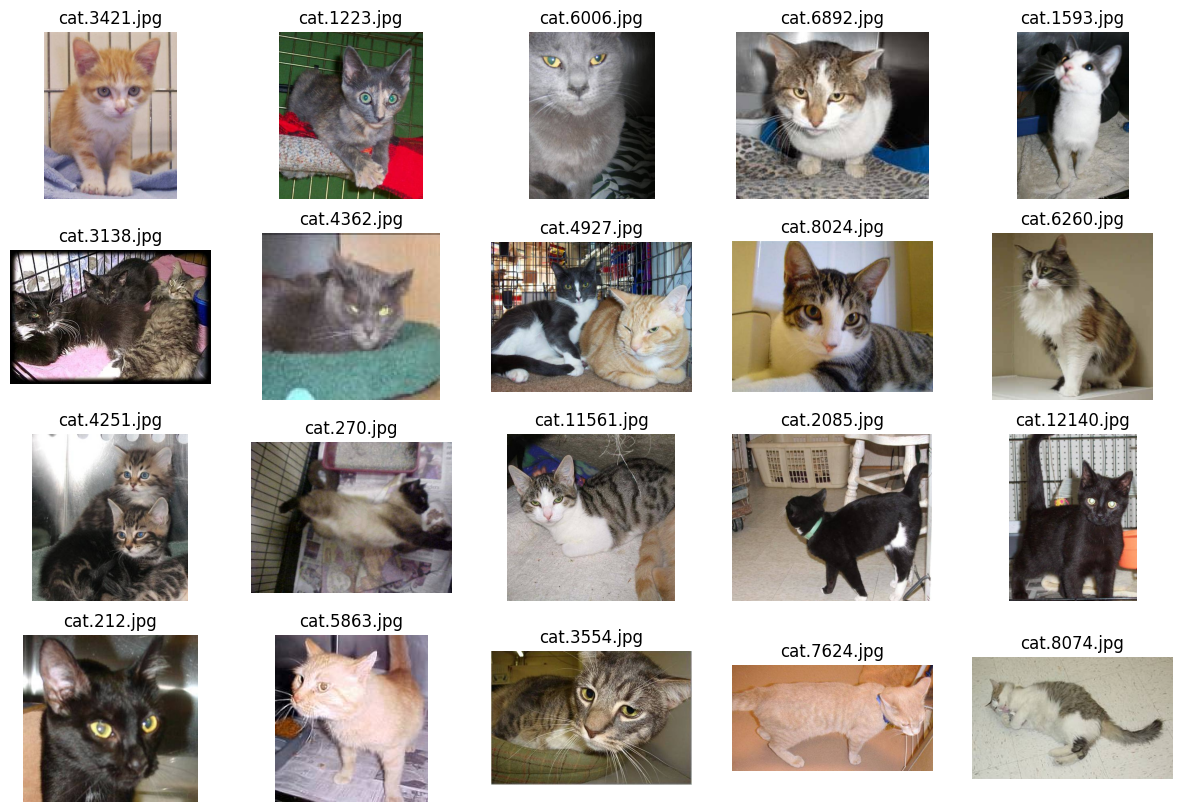

Sample validation dog images


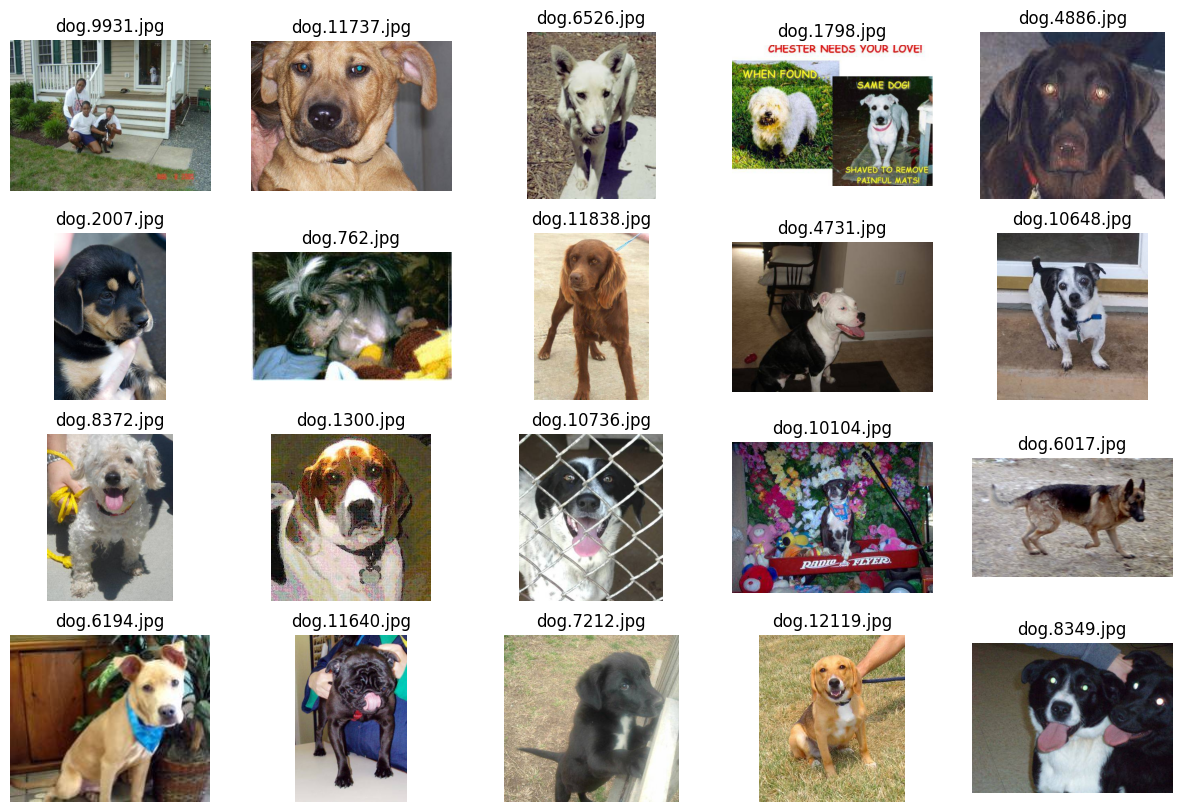

In [ ]:
val_cats_path = '/content/cats-vs-dogs/validation/cats'
val_dogs_path = '/content/cats-vs-dogs/validation/dogs'

print("Sample validation cat images")
display_images(val_cats_path)

print("Sample validation dog images")
display_images(val_dogs_path)

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale=1./255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [ ]:
train_dir = '/content/cats-vs-dogs/training'
val_dir = '/content/cats-vs-dogs/validation'

train_genetator, val_generator = train_val_generators(train_dir, val_dir)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3

def pre_trained_model():

  pre_trained_model = InceptionV3(input_shape=(224, 224, 3),
                                  include_top=False,
                                  weights="imagenet")

  for layer in pre_trained_model.layers:
    layer.trainable = False


  return pre_trained_model

In [ ]:
base_model = pre_trained_model()

base_model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [ ]:
last_output = base_model.get_layer('mixed7')
last_layer = last_output.output

print(last_layer.shape)

(None, 12, 12, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

def create_model(pre_trained_model, last_layer_output):

  x = Flatten()(last_layer_output)

  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(1, activation='sigmoid')(x)

  model = Model(inputs=pre_trained_model.input, outputs=x)

  model.compile(optimizer = RMSprop(learning_rate=0.001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

In [ ]:
model = create_model(base_model, last_layer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.969):
      print('\nReached 97% accuracy, so cancelling training!')
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

history = model.fit(train_genetator,
                    steps_per_epoch = 20,
                    validation_data = val_generator,
                    epochs = 50,
                    verbose = 2,
                    callbacks = callbacks)

Epoch 1/50
20/20 - 32s - loss: 5.6738 - accuracy: 0.7219 - val_loss: 0.2686 - val_accuracy: 0.8940 - 32s/epoch - 2s/step
Epoch 2/50
20/20 - 19s - loss: 0.2284 - accuracy: 0.9125 - val_loss: 0.4402 - val_accuracy: 0.8536 - 19s/epoch - 969ms/step
Epoch 3/50
20/20 - 16s - loss: 0.3311 - accuracy: 0.8813 - val_loss: 0.0626 - val_accuracy: 0.9776 - 16s/epoch - 795ms/step
Epoch 4/50
20/20 - 16s - loss: 0.1770 - accuracy: 0.9297 - val_loss: 0.1245 - val_accuracy: 0.9476 - 16s/epoch - 817ms/step
Epoch 5/50
20/20 - 18s - loss: 0.1829 - accuracy: 0.9250 - val_loss: 0.0513 - val_accuracy: 0.9800 - 18s/epoch - 901ms/step
Epoch 6/50
20/20 - 16s - loss: 0.1557 - accuracy: 0.9453 - val_loss: 0.0657 - val_accuracy: 0.9752 - 16s/epoch - 814ms/step
Epoch 7/50
20/20 - 20s - loss: 0.1718 - accuracy: 0.9469 - val_loss: 0.0486 - val_accuracy: 0.9820 - 20s/epoch - 1s/step
Epoch 8/50
20/20 - 16s - loss: 0.1860 - accuracy: 0.9359 - val_loss: 0.0480 - val_accuracy: 0.9856 - 16s/epoch - 796ms/step
Epoch 9/50
20/

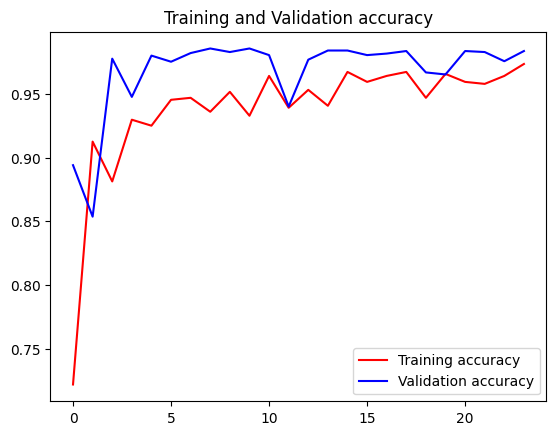

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import img_to_array, load_img

uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = load_img(path, target_size=(224, 224))

  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0] > 0.5:
    print(fn + " is a dog.")
  else:
    print(fn + " is a cat.")

Saving 6.jpg to 6.jpg
1/1 [==============================] - 2s 2s/step
[0.99971896]
6.jpg is a dog.


In [ ]:
# my_model = tf.keras.models.load_model('cats-vs-dogs_classifier.h5')

# my_model.summary()

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dir_path = '/content/gdrive/My Drive/keras-model'

files = os.listdir(dir_path)

for file in files:
  print(file)

hello


In [ ]:
model.save('/content/gdrive/My Drive/keras-model/cats-vs-dogs_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# import pandas as pd
# import numpy as np
# from tensorflow.keras.preprocessing import image

# test_images_dir = '/content/dataset/test1'

# test_images_ids = [filename.split('.')[0] for filename in os.listdir(test_images_dir) if filename.endswith('.jpg')]

# def preprocess_images(img_path):
#   img = image.load_img(img_path, target_size=(224, 224))
#   img_array = image.img_to_array(img)
#   img_array = np.expand_dims(img_array, axis=0)
#   img_array /= 255

#   return img_array

# predictions = []

# for img_id in test_images_ids:
#   img_path = os.path.join(test_images_dir, f'{img_id}.jpg')
#   processed_img = preprocess_images(img_path)
#   prediction = model.predict(processed_img)[0][0]

#   if prediction > 0.5:
#     predictions.append(1)
#   else:
#     predictions.append(0)


# submission_df = pd.DataFrame({"id" : test_images_ids, "label" : predictions})

# submission_df.to_csv('submission.csv', index=False)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/My Drive/keras-model/cats-vs-dogs_classifier.h5')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
import pickle
from google.colab import files

def download_model():

  with open('/content/gdrive/My Drive/keras-model/model.pkl', 'wb') as f:
    pickle.dump(model, f)

  #files.download('model.pkl')


download_model()